In [13]:
import matplotlib.pyplot as plt
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from scipy.spatial import Delaunay
import numpy as np

In [14]:
dfWhite = pd.read_csv('white.csv')
#dfBlack = pd.read_csv('data2.csv')
#dfGreen = pd.read_csv('data3.csv')
#dfConveyor = pd.read_csv('data4.csv')
dfWhite.head(100)

,Red,Green,Blue,Clear,ColorTemp,Lux
0,9607,10292,7171,27751,4370,7877
1,9616,10301,7178,27778,4371,7883
2,9616,10301,7178,27778,4371,7883
3,9615,10302,7177,27776,4370,7885
4,9616,10302,7178,27778,4370,7884
...,...,...,...,...,...,...
92,49699,60496,42467,65535,4835,48267
93,50297,61044,43078,65535,4856,48491
94,61645,65535,54848,65535,5702,43281
95,65535,65535,58918,65535,6320,39039


In [15]:
dfWhite.columns

Index(['Red', 'Green', 'Blue', 'Clear', 'ColorTemp', 'Lux'], dtype='object')

In [16]:
points = dfWhite[['Red','Green','Blue']].values
tri = Delaunay(points[:, :2])

<IPython.core.display.Javascript object>


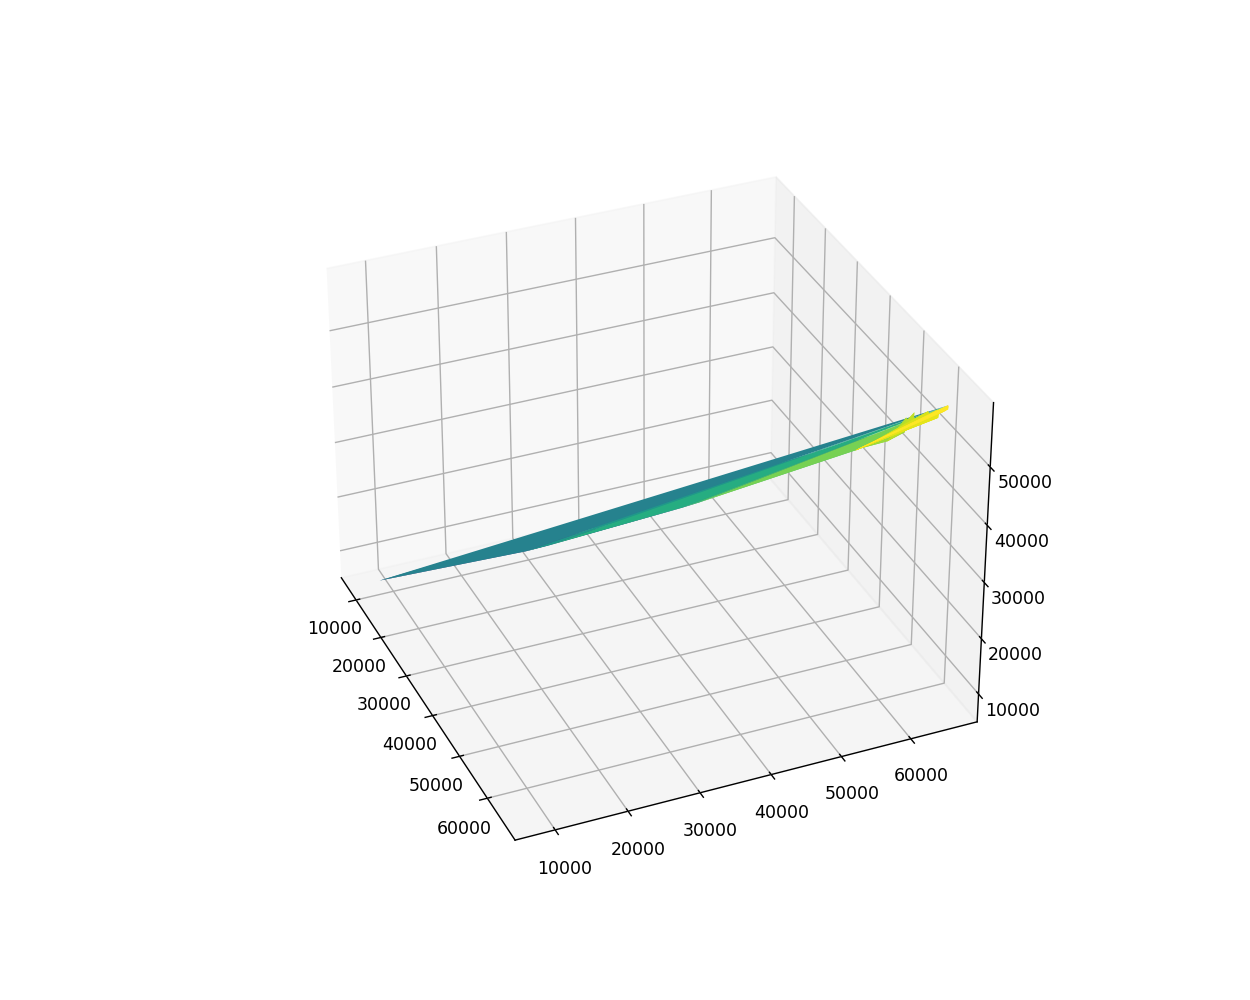

In [17]:
fig = plt.figure(figsize=(10, 8))
ax = plt.axes(projection='3d')

# Plot the surface
ax.plot_trisurf(points[:, 0], points[:, 1], points[:, 2], triangles=tri.simplices, cmap='viridis', edgecolor='none')

%matplotlib notebook
plt.figure(figsize=(10,8))
ax = plt.axes(projection='3d')
fg1 = ax.scatter3D(dfWhite['Red'], dfWhite['Green'], dfWhite['Blue'])

#fg2 = ax.scatter3D(dfBlack['r'], dfBlack['g'], dfBlack['b'])
#fg3 = ax.scatter3D(dfGreen['r'], dfGreen['g'], dfGreen['b'])
#fg4 = ax.scatter3D(dfConveyor['r'], dfConveyor['g'], dfConveyor['b'])